In [ ]:
from google.colab import files

uploaded = files.upload()

Saving audio_parcial.mp3 to audio_parcial (1).mp3


In [1]:
#Cree en el archivo de python una clase que se llame fibonacci, esa clase debe ser iterable
# y debe recibir como parámetro de entrada el número final hasta el cual se quiere calcular fibonacci.
#Ensaye la función con un for y un tiempo de pausa de 5 segundos donde se vea que en cada iteración se
#devuelve en orden el valor de la serie hasta el número final. 20%


import time
#creacion de la clase fibonacci
class Fibonacci:
    def __init__(self, final):
        self.final = final
        self.x, self.y= 0, 1

    def __iter__(self):
        return self

    def __next__(self):
        if self.x > self.final:
            raise StopIteration

        result = self.x
        temp = self.x
        self.x = self.y
        self.y= temp + self.y

        return result

# Uso de la clase Fibonacci en un bucle for con un tiempo de pausa de 5 segundos
if __name__ == "__main__":
    final_number = int(input("Ingrese el número final para calcular Fibonacci: "))

    fibonacci_sequencia = Fibonacci(final_number)

    for value in fibonacci_sequencia:
        print(value)
        time.sleep(5)


Ingrese el número final para calcular Fibonacci: 10
0
1
1
2
3
5
8


Ingrese la ruta del archivo de audio: audio_parcial.mp3
¿Desea graficar un solo canal? (y/n): n


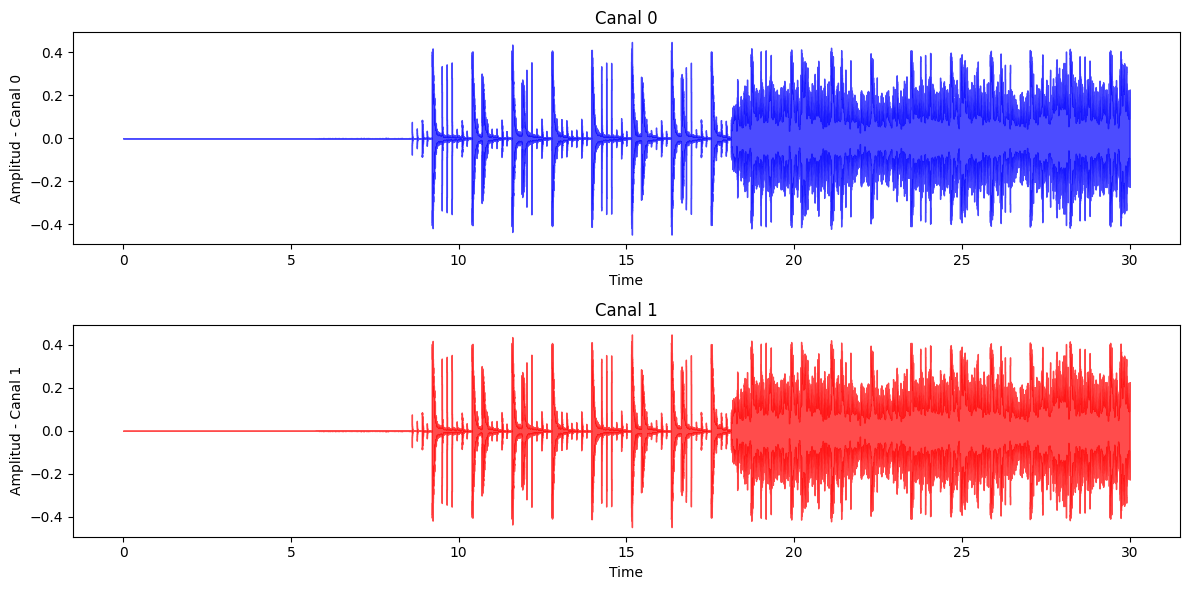

In [ ]:
#Un método que grafique la señal en el tiempo, la señal debe poder recibir un parámetro que
#diga si se va a graficar un canal o dos, según el parámetro se debe hacer una gráfica de un solo canal,
#o una gráfica con subplots de cada canal.10%

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

class grafica_audio:
    def __init__(self, audio_path):
        self.audio_path = audio_path

    def plot_audio(self, mono=True):

        # Cargar el archivo de audio
        y, sr = librosa.load(self.audio_path, duration=30, mono=mono)

        # Configurar ventana
        plt.figure(figsize=(12, 6))

        if mono or y.ndim == 1:
            # Si graficar un canal
            librosa.display.waveshow(y, sr=sr, color='b', alpha=0.7)
            plt.title('Canal único')
            plt.ylabel('Amplitud')
        else:
            # graficar dos canales
            plt.subplot(2, 1, 1)
            librosa.display.waveshow(y[0, :], sr=sr, color='b', alpha=0.7)
            plt.title('Canal 0')
            plt.ylabel('Amplitud - Canal 0')

            plt.subplot(2, 1, 2)
            librosa.display.waveshow(y[1, :], sr=sr, color='r', alpha=0.7)
            plt.title('Canal 1')
            plt.ylabel('Amplitud - Canal 1')


        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    # ruta del archivo de audio al usuario
    audio_path = input("Ingrese la ruta del archivo de audio: ")

    # graficar un canal o dos
    mono_input = input("¿Desea graficar un solo canal? (y/n): ")
    mono = mono_input.lower() == 'y'

    # instancia
    audio_visualizer = grafica_audio(audio_path)
    audio_visualizer.plot_audio(mono)


Ingrese la ruta del archivo de audio: audio_parcial.mp3
¿Mostrar en escala de grises? (y/n): n
Ingrese la frecuencia mínima a graficar (dejar en blanco para omitir): 1000
Ingrese la frecuencia máxima a graficar (dejar en blanco para omitir): 50000
Ingrese el tamaño de ventana para el espectrograma (128-8192, dejar en blanco para usar el valor predeterminado (128, 8192)): 340
Ingrese la escala de frecuencia (linear/mel): mel
Opciones válidas para el mapa de colores: viridis, plasma, inferno, magma, cividis, jet, rainbow, gray, bone 
, hot, cool, copper, pink, spring, summer, autumn, winter
Ingrese el mapa de colores: magma


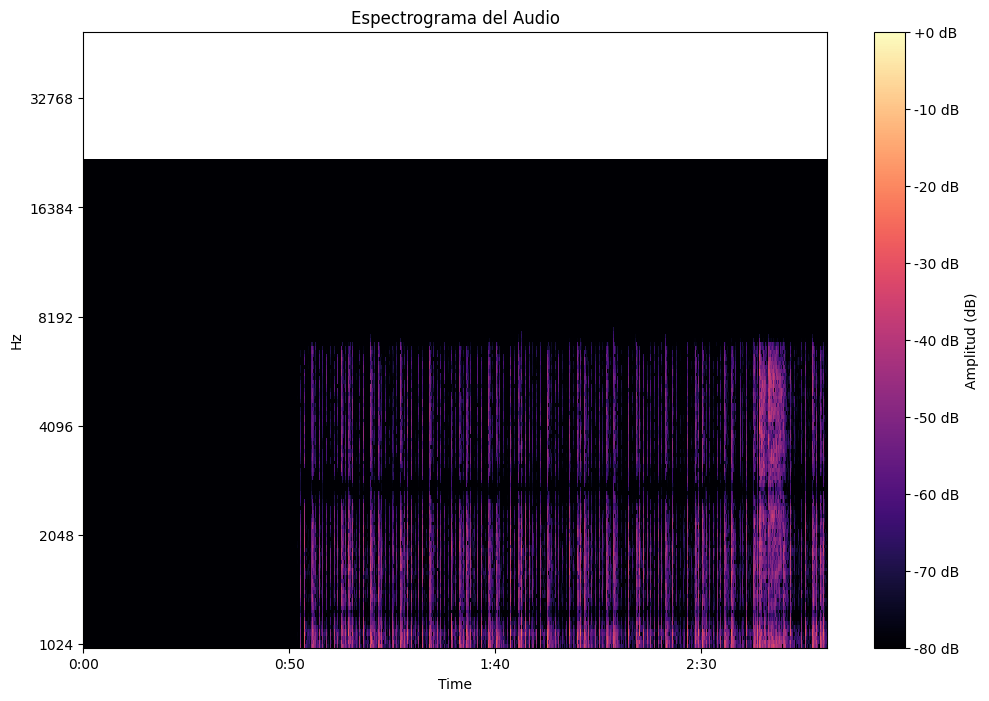

In [ ]:
#Un método que calcule la transformada de fourier y grafique el espectrograma del audio ->
#agregue al menos 4 parámetros de entrada con los cuales se modifique la salida.
#Ejemplo (escala de grises, frecuencia mínima a graficar, frecuencia máxima a graficar, etc) 10%

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

class espectrograma_audio:
    def __init__(self, audio_path):
        self.audio_path = audio_path

    def plot_spectrogram(self, grayscale=False, min_freq=None, max_freq=None, figsize=(10, 6),
                         color_map='viridis', window_size=2048, scale='linear'):

        y, sr = librosa.load(self.audio_path, duration=30, sr=None)

        # transformada de Fourier
        fourier = librosa.stft(y, n_fft=window_size)

        # Calcular el valor absoluto de la transformada de Fourier
        fourier_abs = np.abs(fourier)

        # Calcular el espectrograma en escala de decibeles
        spec = librosa.amplitude_to_db(fourier_abs, ref=np.max)


        plt.figure(figsize=figsize)

        # Modificar la salida según los parámetros
        if grayscale:
            #espectrograma en escala de grises
            librosa.display.specshow(spec, cmap='gray_r', x_axis='time', y_axis=scale, sr=sr)
        else:
            #espectrograma en color con el mapa de colores
            librosa.display.specshow(spec, cmap=color_map, x_axis='time', y_axis=scale, sr=sr)

        # Configurar los límites de frecuencia
        if min_freq is not None and max_freq is not None:
            plt.ylim([min_freq, max_freq])


        plt.title('Espectrograma del Audio')
        plt.colorbar(format="%+2.f dB", label='Amplitud (dB)')

        # Mostrar la gráfica
        plt.show()

# Lista de opciones válidas para el mapa de colores
valid_color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'jet', 'rainbow', 'gray', 'bone \n', 'hot', 'cool', 'copper', 'pink', 'spring', 'summer', 'autumn', 'winter']


if __name__ == "__main__":

    # ruta del archivo de audio
    audio_path = input("Ingrese la ruta del archivo de audio: ")

    # parámetros del usuario
    grayscale_input = input("¿Mostrar en escala de grises? (y/n): ")
    grayscale = grayscale_input.lower() == 'y'

    min_freq_input = input("Ingrese la frecuencia mínima a graficar (dejar en blanco para omitir): ") or 'None'
    min_freq = float(min_freq_input) if min_freq_input != 'None' else None

    max_freq_input = input("Ingrese la frecuencia máxima a graficar (dejar en blanco para omitir): ") or 'None'
    max_freq = float(max_freq_input) if max_freq_input != 'None' else None

    window_size_range = (128, 8192)
    window_size_input = input(f"Ingrese el tamaño de ventana para el espectrograma ({window_size_range[0]}-{window_size_range[1]}, dejar en blanco para usar el valor predeterminado {window_size_range}): ") or str(window_size)
    window_size = int(window_size_input) if window_size_range[0] <= int(window_size_input) <= window_size_range[1] else window_size_range

    scale = input("Ingrese la escala de frecuencia (linear/mel): ") or 'linear'

    # Si se elige escala de grises
    if not grayscale:
        print("Opciones válidas para el mapa de colores:", ', '.join(valid_color_maps))
        color_map = input("Ingrese el mapa de colores: ").lower()
        color_map = color_map if color_map in valid_color_maps else 'viridis'
    else:
        color_map = 'gray_r'

    # instancia
    audio_spectrogram = espectrograma_audio(audio_path)
    audio_spectrogram.plot_spectrogram(grayscale=grayscale, min_freq=min_freq, max_freq=max_freq,
                                       color_map=color_map, window_size=window_size, scale=scale, figsize=(12, 8))


Ingrese la ruta del archivo de audio: audio_parcial.mp3
¿Mostrar en escala de grises? (y/n): y
Ingrese la frecuencia mínima a graficar (o deje en blanco para omitir): 
Ingrese la frecuencia máxima a graficar (o deje en blanco para omitir): 
Ingrese el tamaño de ventana para el cálculo del espectrograma (128-8192, o deje en blanco para usar el valor predeterminado): 
Ingrese la escala de frecuencia (linear/mel): mel
Ingrese el nombre de archivo para guardar el espectrograma (o deje en blanco para usar 'espectrograma_default'): 
Espectrograma guardado como espectrograma_default.png


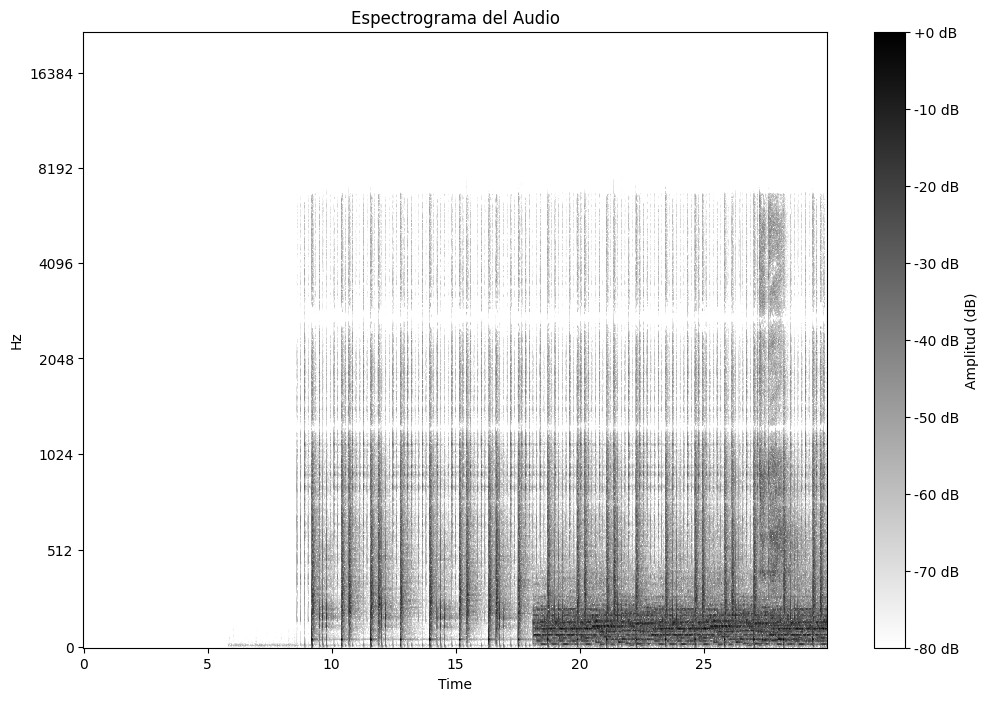

In [ ]:
#Un método que permite guardar el espectrograma generado con un nombre en específico que es enviado como parámetro,
#si no se envía nada debe guardarse con el nombre "espectrograma_default" 10%
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

class AudioSpectrogram:
    def __init__(self, audio_path):
        self.audio_path = audio_path
        self.spec = None  # Agregamos un atributo para almacenar el espectrograma

    def plot_spectrogram(self, grayscale=False, min_freq=None, max_freq=None, figsize=(10, 6),
                         color_map='viridis', window_size=2048, scale='linear'):

        y, sr = librosa.load(self.audio_path, duration=30, sr=None)

        #transformada de Fourier
        fourier = librosa.stft(y, n_fft=window_size)

        # valor absoluto de la transformada de Fourier
        fourier_abs = np.abs(fourier)

        # Calcular el espectrograma en escala de decibeles
        self.spec = librosa.amplitude_to_db(fourier_abs, ref=np.max)


        plt.figure(figsize=figsize)

        # Modificar la salida según los parámetros
        if grayscale:
            #  espectrograma en escala de grises
            librosa.display.specshow(self.spec, cmap='gray_r', x_axis='time', y_axis=scale, sr=sr)
        else:
            # espectrograma en color con el mapa de colores especificado
            librosa.display.specshow(self.spec, cmap=color_map, x_axis='time', y_axis=scale, sr=sr)

        # Configurar los límites de frecuencia
        if min_freq is not None and max_freq is not None:
            plt.ylim([min_freq, max_freq])

        # Añadir etiquetas y título
        plt.title('Espectrograma del Audio')
        plt.colorbar(format="%+2.f dB", label='Amplitud (dB)')

    def save_spectrogram(self, filename='espectrograma_default'):
        if self.spec is not None:
            plt.imsave(f'{filename}.png', self.spec, cmap='viridis')
            print(f'Espectrograma guardado como {filename}.png')
        else:
            print('No se ha generado un espectrograma para guardar. Utiliza plot_spectrogram primero.')

# Lista de opciones válidas para el mapa de colores
valid_color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'jet', 'rainbow', 'gray', 'bone', 'hot', 'cool', 'copper', 'pink', 'spring', 'summer', 'autumn', 'winter']

# Ejemplo de uso
if __name__ == "__main__":
    # ruta del archivo de audio
    audio_path = input("Ingrese la ruta del archivo de audio: ")

    # instancia
    audio_spectrogram = AudioSpectrogram(audio_path)

    # parámetros adicionales
    grayscale_input = input("¿Mostrar en escala de grises? (y/n): ")
    grayscale = grayscale_input.lower() == 'y'

    min_freq_input = input("Ingrese la frecuencia mínima a graficar (o deje en blanco para omitir): ") or 'None'
    min_freq = float(min_freq_input) if min_freq_input != 'None' else None

    max_freq_input = input("Ingrese la frecuencia máxima a graficar (o deje en blanco para omitir): ") or 'None'
    max_freq = float(max_freq_input) if max_freq_input != 'None' else None

    window_size_range = (128, 8192)  # Rango permitido para el tamaño de ventana
    window_size_input = input(f"Ingrese el tamaño de ventana para el cálculo del espectrograma ({window_size_range[0]}-{window_size_range[1]}, o deje en blanco para usar el valor predeterminado): ") or str(2048)
    window_size = int(window_size_input) if window_size_range[0] <= int(window_size_input) <= window_size_range[1] else 2048

    scale = input("Ingrese la escala de frecuencia (linear/mel): ") or 'linear'

    # Si se elige escala de grises, no mostrar la opción de mapa de colores
    if not grayscale:
        print("Opciones válidas para el mapa de colores:", ', '.join(valid_color_maps))
        color_map = input("Ingrese el mapa de colores: ").lower()
        color_map = color_map if color_map in valid_color_maps else 'viridis'
    else:
        color_map = 'gray_r'

    # Graficar con los parámetros
    audio_spectrogram.plot_spectrogram(grayscale=grayscale, min_freq=min_freq, max_freq=max_freq,
                                       color_map=color_map, window_size=window_size, scale=scale, figsize=(12, 8))

    # Solicitar nombre de archivo para guardar (o utilizar el predeterminado)
    save_filename = input("Ingrese el nombre de archivo para guardar el espectrograma (o deje en blanco para usar 'espectrograma_default'): ") or 'espectrograma_default'

    # Guardar grafica espectrograma con el nombre especificado
    audio_spectrogram.save_spectrogram(save_filename)



--- Menú Principal ---
1. Ingresar productos
2. Realizar ventas
3. Mostrar gráfica de ventas
4. Ver listado de productos con precios y stock
5. Salir
Seleccione una opción (1-5): 1
Ingrese el nombre del producto (o escriba 'fin' para terminar): pan
Ingrese el precio de pan: 100
Ingrese la cantidad de pan en stock: 20
Ingrese el nombre del producto (o escriba 'fin' para terminar): harina
Ingrese el precio de harina: 300
Ingrese la cantidad de harina en stock: 20
Ingrese el nombre del producto (o escriba 'fin' para terminar): azucar
Ingrese el precio de azucar: 200
Ingrese la cantidad de azucar en stock: 50
Ingrese el nombre del producto (o escriba 'fin' para terminar): fin

--- Menú Principal ---
1. Ingresar productos
2. Realizar ventas
3. Mostrar gráfica de ventas
4. Ver listado de productos con precios y stock
5. Salir
Seleccione una opción (1-5): 2
Ingrese el nombre del producto que desea vender (o escriba 'fin' para volver al menú): azucar
Ingrese la cantidad de unidades de azucar 

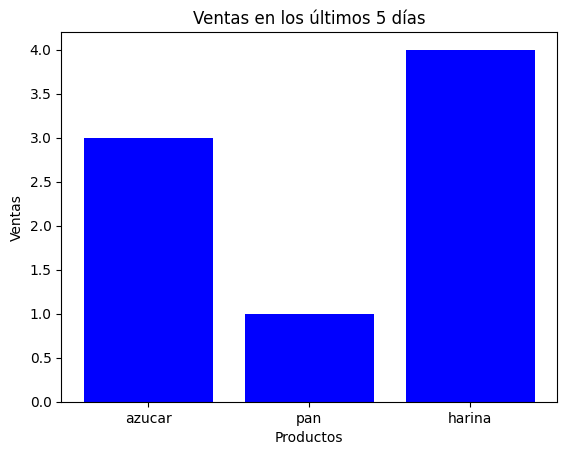


--- Menú Principal ---
1. Ingresar productos
2. Realizar ventas
3. Mostrar gráfica de ventas
4. Ver listado de productos con precios y stock
5. Salir
Seleccione una opción (1-5): 5
¡bye


In [ ]:
#Cree una clase tienda en la que se tenga un estock de productos, sus precios, métodos para agregar productos con sus precios,
#métodos para vender, y un método para mostrar una gráfica de su elección (puede ser ventas en 5 días, productos más vendidos, etc) 20%

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

class Tienda:
    def __init__(self):
        self.stock = defaultdict(int)
        self.precios = {}
        self.ventas = defaultdict(int)

    def agregar_producto(self, *args, **kwargs):
        for producto, precio_stock in kwargs.items():
            precio, stock = precio_stock
            self.stock[producto] += stock
            self.precios[producto] = precio

    def vender_producto(self, *args, **kwargs):
        producto = kwargs.get('producto')
        cantidad = kwargs.get('cantidad')

        if producto not in self.stock:
            print(f"Error: No existe el producto '{producto}' en el stock. Por favor, verifique el nombre del producto.")
            return False

        if self.stock[producto] >= cantidad:
            self.stock[producto] -= cantidad
            self.ventas[producto] += cantidad
            print(f"Venta realizada: {cantidad} cantidad de unidades de {producto} por ${self.precios[producto]} cada una.")
            return True
        else:
            print(f"No hay suficientes unidades de {producto} en stock.")
            return False

    def mostrar_grafica_ventas(self):
        productos = list(self.ventas.keys())
        ventas = list(self.ventas.values())

        if not productos:
            print("No hay datos de ventas para mostrar.")
            return

        # Graficar las ventas en los últimos 10 días
        dias = np.arange(1, 10)
        plt.bar(productos, ventas, color='blue')
        plt.xlabel('Productos')
        plt.ylabel('Ventas')
        plt.title('Ventas en los últimos 5 días')
        plt.show()

    def mostrar_listado_productos(self):
        print("\nListado de productos con precios y stock:")
        for producto, precio in self.precios.items():
            print(f"{producto}: ${precio} - Stock: {self.stock[producto]} unidades")

# instancia de Tienda
tienda = Tienda()

# Menú
while True:
    print("\n--- Menú Principal ---")
    print("1. Ingresar productos")
    print("2. Realizar ventas")
    print("3. Mostrar gráfica de ventas")
    print("4. Ver listado de productos con precios y stock")
    print("5. Salir")

    opcion = input("Seleccione una opción (1-5): ")

    if opcion == '1':
        # Ingresar productos y precios
        productos = {}
        while True:
            producto = input("Ingrese el nombre del producto (o escriba 'fin' para terminar): ")
            if producto.lower() == 'fin':
                break

            precio = float(input(f"Ingrese el precio de {producto}: "))
            stock = int(input(f"Ingrese la cantidad de {producto} en stock: "))
            productos[producto] = (precio, stock)

        tienda.agregar_producto(**productos)

    elif opcion == '2':
        # Realizar ventas
        producto_venta = input("Ingrese el nombre del producto que desea vender (o escriba 'fin' para volver al menú): ")
        if producto_venta.lower() == 'fin':
            continue

        cantidad_venta = int(input(f"Ingrese la cantidad de unidades de {producto_venta} que desea vender: "))
        tienda.vender_producto(producto=producto_venta, cantidad=cantidad_venta)

    elif opcion == '3':
        # Mostrar gráfica de ventas
        tienda.mostrar_grafica_ventas()

    elif opcion == '4':
        # Ver listado de productos con precios y stock
        tienda.mostrar_listado_productos()

    elif opcion == '5':
        # Salir del programa
        print("¡bye")
        break

    else:
        print("Opción no válida. Por favor, elija una opción del 1 al 5.")
